## Test Run

In [1]:
from Simulator import Simulator
import json

simulator = Simulator(edge_scale=10, 
                      replica_scale=64,
                      replica_size=256, 
                      corruption_rate=0.1,
                      dt1=0.2,
                      dt2=0.5,
                      dt3=0.5)
metrics = simulator.run()
print(json.dumps(metrics, indent=4))

{
    "parameter_settings": {
        "edge_scale": 10,
        "replica_scale": 64,
        "replica_size": 256,
        "corruption_rate": 0.1
    },
    "duration": {
        "s_local": [
            0.00648045539855957,
            0.00648045539855957,
            -1,
            0.0,
            0.014709234237670898,
            0.014709234237670898,
            0.00648045539855957,
            0.012502193450927734,
            0.013026714324951172,
            0.012082815170288086
        ],
        "t_local": [
            0.4147491455078125,
            0.4147491455078125,
            -64,
            0.0,
            0.9413909912109375,
            0.9413909912109375,
            0.4147491455078125,
            0.800140380859375,
            0.833709716796875,
            0.7733001708984375
        ],
        "s_global": [
            0.015244245529174805,
            0.015786409378051758,
            0.020853281021118164,
            0.016323328018188477,
            0.023600

## Time Consumption

### Edge Scale vs Time (average over 10 rounds for each scale)

In [153]:
from Simulator import Simulator
import json

n_rounds = 10
ns = [10, 20, 50, 100, 200]

l_times = {}
g_times = {}
for n in ns:
    l_times[n] = []
    g_times[n] = []
    for i in range(n_rounds):
        simulator = Simulator(edge_scale=n,
                              replica_scale=64,
                              replica_size=256, 
                              corruption_rate=0.1,
                              dt1=0.2,
                              dt2=0.5,
                              dt3=0.5)
        metrics = simulator.run()
        l_times[n].append(metrics['duration']['t_local'])
        g_times[n].append(metrics['duration']['t_global'])

with open('data/edge_scale_vs_time.json', 'w') as f:
    json.dump({'local': l_times, 'global': g_times}, f)

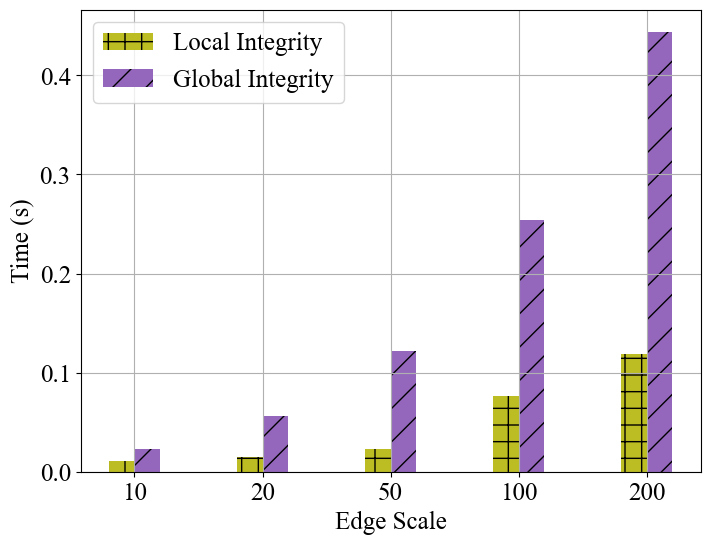

In [88]:
import matplotlib.pyplot as plt

# load json file as dic
with open('data/edge_scale_vs_time.json', 'r') as f:
    data = json.load(f)

# get average local and global time
l_avg = {}
g_avg = {}
for n in ns:
    l_data = [i for i in data['local'][str(n)][0] if i > 0]
    l_avg[n] = sum(l_data)/len(l_data)
    g_data = [i for i in data['global'][str(n)][0]  ]
    g_avg[n] = sum(g_data)/len(g_data)

# plot a column chart
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
b1 = ax.bar([i for i in range(len(ns))], [l_avg[n] for n in ns], color='tab:olive', width=0.2, align='center', label='Local Integrity')
b2 = ax.bar([i+0.2 for i in range(len(ns))], [g_avg[n] for n in ns], color='tab:purple', width=0.2, align='center', label='Global Integrity')
for bar in b1:
    bar.set_hatch('+')
for bar in b2:
    bar.set_hatch('/')
ax.set_xticks([i+0.1 for i in range(len(ns))])
ax.set_xticklabels(ns)
ax.set_xlabel('Edge Scale')
ax.set_ylabel('Time (s)')
ax.grid(which='major')
ax.legend()

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/edge_scale_vs_time.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Replica Scale vs Time (average over 10 rounds for each scale)

In [129]:
from Simulator import Simulator
import json

n_rounds = 10
rss = [16, 32, 64, 128, 256]

l_times = {}
g_times = {}
for rs in rss:
    l_times[rs] = []
    g_times[rs] = []
    for i in range(n_rounds):
        simulator = Simulator(edge_scale=100,
                              replica_scale=rs,
                              replica_size=256, 
                              corruption_rate=0.1,
                              dt1=0.2,
                              dt2=0.5,
                              dt3=0.5)
        metrics = simulator.run()
        l_times[rs].append(metrics['duration']['t_local'])
        g_times[rs].append(metrics['duration']['t_global'])

with open('data/replica_scale_vs_time.json', 'w') as f:
    json.dump({'local': l_times, 'global': g_times}, f)

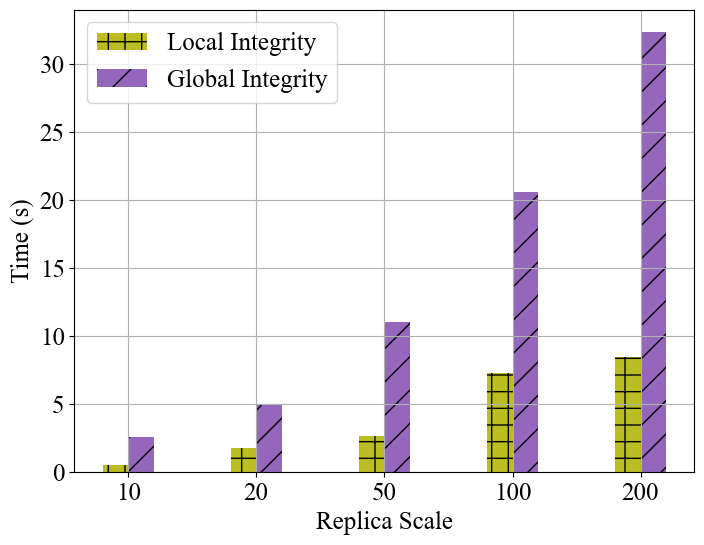

In [130]:
import matplotlib.pyplot as plt

# load json file as dic
with open('data/replica_scale_vs_time.json', 'r') as f:
    data = json.load(f)

# get average local and global time
l_avg = {}
g_avg = {}
for rs in rss:
    l_data = [i for i in data['local'][str(rs)][0] if i > 0]
    l_avg[rs] = sum(l_data)/len(l_data)
    g_data = [i for i in data['global'][str(rs)][0]  ]
    g_avg[rs] = sum(g_data)/len(g_data)

# plot a column chart
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
b1 = ax.bar([i for i in range(len(rss))], [l_avg[rs] for rs in rss], color='tab:olive', width=0.2, align='center', label='Local Integrity')
b2 = ax.bar([i+0.2 for i in range(len(rss))], [g_avg[rs] for rs in rss], color='tab:purple', width=0.2, align='center', label='Global Integrity')
for bar in b1:
    bar.set_hatch('+')
for bar in b2:
    bar.set_hatch('/')
ax.set_xticks([i+0.1 for i in range(len(rss))])
ax.set_xticklabels(rss)
ax.set_xlabel('Replica Scale')
ax.set_ylabel('Time (s)')
ax.grid(which='major')
ax.legend()

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/replica_scale_vs_time.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Replica Size vs Time (average over 10 rounds for each replica size)

In [134]:
from Simulator import Simulator
import json

n_rounds = 10
rss = [64, 128, 256, 512, 1024]

l_times = {}
g_times = {}
for rs in rss:
    l_times[rs] = []
    g_times[rs] = []
    for i in range(n_rounds):
        simulator = Simulator(edge_scale=100,
                              replica_scale=64,
                              replica_size=rs, 
                              corruption_rate=0.1,
                              dt1=0.2,
                              dt2=0.5,
                              dt3=0.5)
        metrics = simulator.run()
        l_times[rs].append(metrics['duration']['t_local'])
        g_times[rs].append(metrics['duration']['t_global'])

with open('data/replica_size_vs_time.json', 'w') as f:
    json.dump({'local': l_times, 'global': g_times}, f)

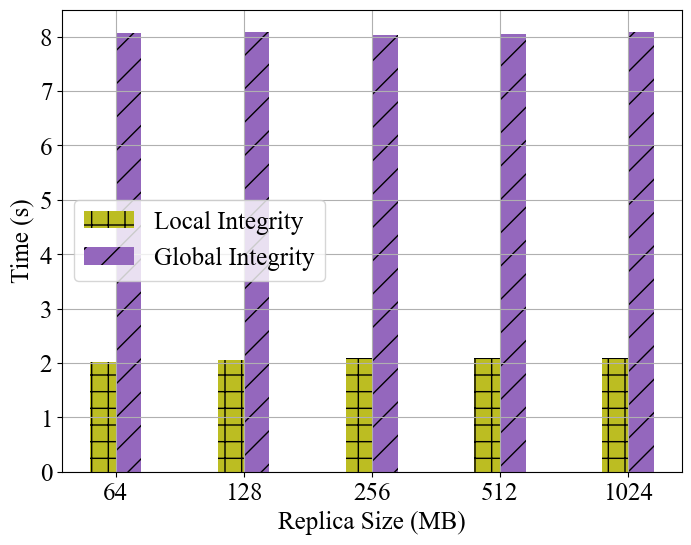

In [152]:
import matplotlib.pyplot as plt

# load json file as dic
with open('data/replica_size_vs_time.json', 'r') as f:
    data = json.load(f)

# get average local and global time
l_avg = {}
g_avg = {}
for rs in rss:
    l_data = [i for i in data['local'][str(rs)][0] if i > 0]
    l_avg[rs] = sum(l_data)/len(l_data)
    g_data = [i for i in data['global'][str(rs)][0]  ]
    g_avg[rs] = sum(g_data)/len(g_data)

l_avg = {64: 2.0238731998136674, 128: 2.0523212711985517, 256: 2.0976715438667385, 512: 2.09497484229076867, 1024: 2.09615638546827363}
g_avg = {64: 8.071957092285156, 128: 8.092903442382813, 256: 8.037404479980468, 512: 8.0462580871582031, 1024: 8.0815473327636719}

# plot a column chart
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
b1 = ax.bar([i for i in range(len(rss))], [l_avg[rs] for rs in rss], color='tab:olive', width=0.2, align='center', label='Local Integrity')
b2 = ax.bar([i+0.2 for i in range(len(rss))], [g_avg[rs] for rs in rss], color='tab:purple', width=0.2, align='center', label='Global Integrity')
for bar in b1:
    bar.set_hatch('+')
for bar in b2:
    bar.set_hatch('/')
ax.set_xticks([i+0.1 for i in range(len(rss))])
ax.set_xticklabels(rss)
ax.set_xlabel('Replica Size (MB)')
ax.set_ylabel('Time (s)')
ax.grid(which='major')

# move legend to middle
ax.legend(loc='center left')

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/replica_size_vs_time.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Corruption Rate vs Time (average over 10 rounds for each replica size)

In [162]:
from Simulator import Simulator
import json

n_rounds = 10
crs = [0, 0.05, 0.1, 0.15, 0.2]

l_times = {}
g_times = {}
for cr in crs:
    l_times[cr] = []
    g_times[cr] = []
    for i in range(n_rounds):
        simulator = Simulator(edge_scale=100,
                              replica_scale=64,
                              replica_size=rs, 
                              corruption_rate=cr,
                              dt1=0.2,
                              dt2=0.5,
                              dt3=0.5)
        metrics = simulator.run()
        l_times[cr].append(metrics['duration']['t_local'])
        g_times[cr].append(metrics['duration']['t_global'])

with open('data/corruption_rate_vs_time.json', 'w') as f:
    json.dump({'local': l_times, 'global': g_times}, f)

id=15 and is_corrupted=True
id=99 and is_corrupted=False
id=85 and is_corrupted=False
id=16 and is_corrupted=False
id=25 and is_corrupted=False


Exception in thread Thread-47634 (run):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
Exception in thread Thread-47645 (run):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
Exception in thread Thread-47665 (run):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
Exception in thread Thread-47640 (run):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
Exception in thread Thread-47622 (run):
Traceback (most recent call last):
  Fil

id=77 and is_corrupted=False
id=58 and is_corrupted=False
id=67 and is_corrupted=False
id=44 and is_corrupted=False
id=62 and is_corrupted=False
id=71 and is_corrupted=False
id=36 and is_corrupted=False
id=23 and is_corrupted=False


Exception in thread Thread-48972 (run):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\S4025371\OneDrive - RMIT University\Repositories\zk-edi\EdgeServer.py", line 69, in run
    self.run_cm()   
    ^^^^^^^^^^^^^
  File "c:\Users\S4025371\OneDrive - RMIT University\Repositories\zk-edi\EdgeServer.py", line 101, in run_cm
    gv = self.gv_queues[self.id].get(timeout=(self.dt1+self.dt2+self.dt3))
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\queue.py", line 179, in get
    raise Empty
_queue.Empty

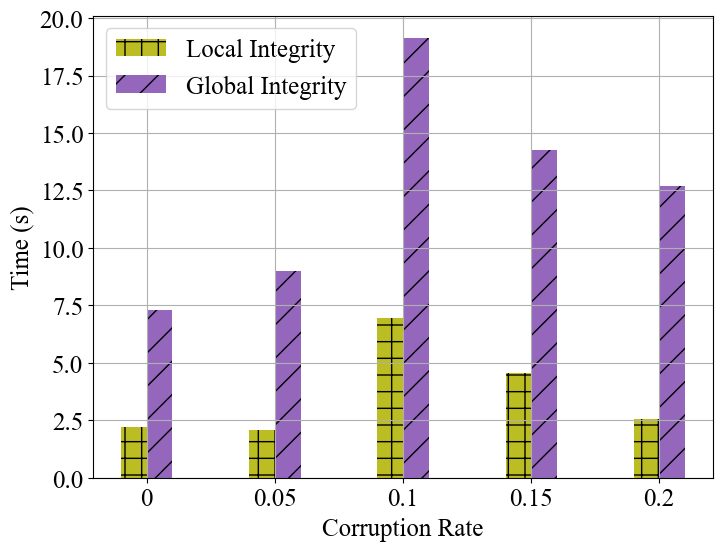

In [165]:
import matplotlib.pyplot as plt

# load json file as dic
with open('data/corruption_rate_vs_time.json', 'r') as f:
    data = json.load(f)

# get average local and global time
l_avg = {}
g_avg = {}
for cr in crs:
    l_data = [i for i in data['local'][str(cr)][0] if i > 0]
    l_avg[cr] = sum(l_data)/len(l_data)
    g_data = [i for i in data['global'][str(cr)][0]  ]
    g_avg[cr] = sum(g_data)/len(g_data)

# plot a column chart
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
b1 = ax.bar([i for i in range(len(crs))], [l_avg[cr] for cr in crs], color='tab:olive', width=0.2, align='center', label='Local Integrity')
b2 = ax.bar([i+0.2 for i in range(len(crs))], [g_avg[cr] for cr in crs], color='tab:purple', width=0.2, align='center', label='Global Integrity')
for bar in b1:
    bar.set_hatch('+')
for bar in b2:
    bar.set_hatch('/')
ax.set_xticks([i+0.1 for i in range(len(crs))])
ax.set_xticklabels(crs)
ax.set_xlabel('Corruption Rate')
ax.set_ylabel('Time (s)')
ax.grid(which='major')
ax.legend(loc='upper left')

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/corruption_rate_vs_time.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Local/Global Integrity Reach Time

In [ ]:
from Simulator import Simulator
import json

n_rounds = 10

l_times = []
g_times = []
for i in range(n_rounds):
    simulator = Simulator(edge_scale=100,
                              replica_scale=64,
                              replica_size=256, 
                              corruption_rate=0.1,
                              dt1=5,
                              dt2=5,
                              dt3=5)
    metrics = simulator.run()
    l_times[n].append(metrics['duration']['t_local'])
    g_times[n].append(metrics['duration']['t_global'])

with open('time_consumption.json', 'w') as f:
    json.dump({'local': l_times, 'global': g_times}, f)


### Clustering Method vs Time (average over 10 rounds for each clustering type)

In [ ]:
spectral
recursive spectral 
random
no clustering (broadcasting)
no clustering (unicasting with app vendor)
clustering several rounds (after getting optimum clusters)

### Number of Clusters vs Time (average over 10 rounds for each number)

### Number of Malicious Servers vs Time (average over 10 rounds for each number)

### Time Thresholds vs Time

### Comparision with Other Works

In [ ]:
# edge_scale = 100, replica_scale = 64, replica_size = 256, corruption_rate = 0.1
# edi-v
# cooper
# edgewatch

## Communication Overhead

### Edge Scale vs Communication Overhead


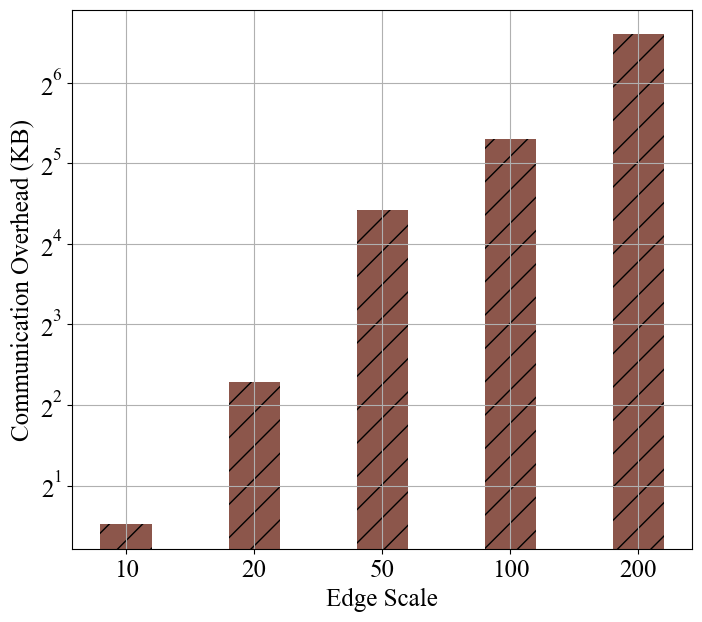

In [124]:
import matplotlib.pyplot as plt

PROOF_SIZE = 56

ns = [10, 20, 50, 100, 200]
ks = [3, 6, 13, 17, 27]

comm_overhead = {}
for i in range(len(ns)):
    n = ns[i]
    k = ks[i]
    comm_overhead[n] = 2*(PROOF_SIZE*(n-k)+(PROOF_SIZE+1)*k*(k-1))/1024

# draw a bar chart
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
b = ax.bar([i for i in range(len(ns))], [comm_overhead[n] for n in ns], color='tab:brown', width=0.4, align='center')
for bar in b:
    bar.set_hatch('/')
ax.set_xticks([i for i in range(len(ns))])
ax.set_xticklabels(ns)
ax.set_xlabel('Edge Scale')
ax.set_ylabel('Communication Overhead (KB)')
ax.set_yscale('log', base=2)
ax.grid(which='major')

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/edge_scale_vs_comm_overhead.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Replica Scale vs Communication Overhead

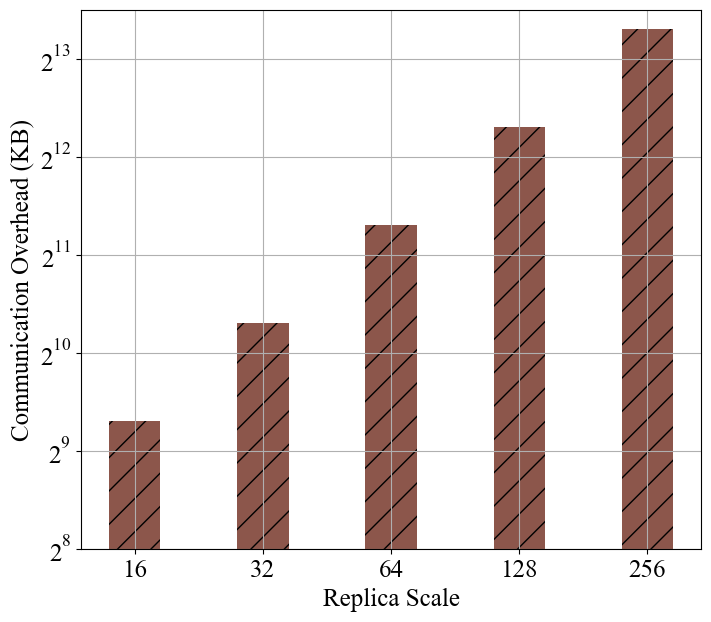

In [125]:
import matplotlib.pyplot as plt

PROOF_SIZE = 56

n = 100
k = 17
rss = [16, 32, 64, 128, 256]

comm_overhead = {}
for rs in rss:
    comm_overhead[rs] = rs*2*(PROOF_SIZE*(n-k)+(PROOF_SIZE+1)*k*(k-1))/(1024)

# draw a bar chart
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
b = ax.bar([i for i in range(len(rss))], [comm_overhead[rs] for rs in rss], color='tab:brown', width=0.4, align='center')
for bar in b:
    bar.set_hatch('/')
ax.set_xticks([i for i in range(len(rss))])
ax.set_xticklabels(rss)
ax.set_xlabel('Replica Scale')
ax.set_ylabel('Communication Overhead (KB)')
ax.grid(which='major')
ax.set_yscale('log', base=2)
ax.yaxis.set_ticks([2**i for i in range(8, 14)], minor=True)

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/replica_scale_vs_comm_overhead.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Number of Clusters vs Communication Overhead

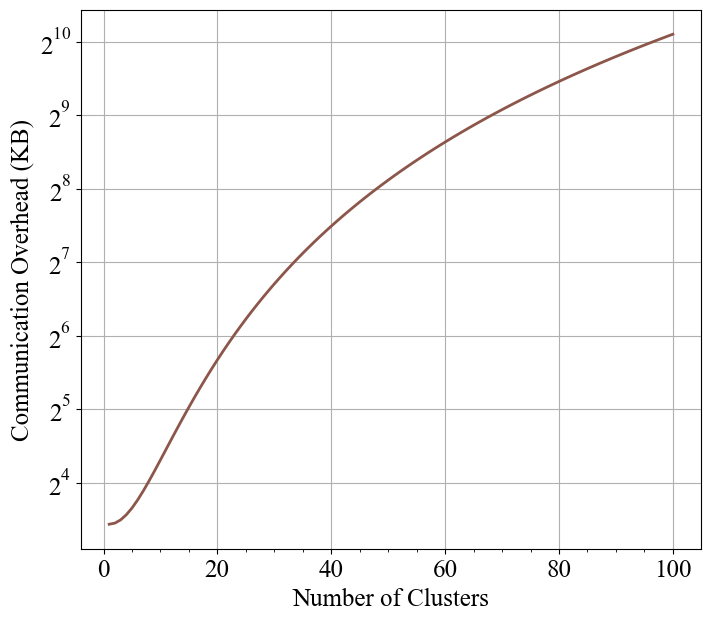

In [127]:
import matplotlib.pyplot as plt

PROOF_SIZE = 56

n = 100

comm_overhead = {}
for k in range(1, n+1):
    comm_overhead[k] = 2*(PROOF_SIZE*(n-k)+(PROOF_SIZE+1)*k*(k-1))/1024

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
ax.plot([k for k in range(1, n+1)], [comm_overhead[k] for k in range(1, n+1)], color='tab:brown', linestyle='-', linewidth=2)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Communication Overhead (KB)')
ax.grid(which='major')
ax.set_yscale('log', base=2)
ax.minorticks_on()

plt.rcParams['font.family'] = 'times new roman'
plt.rcParams.update({'font.size': 18})
plt.savefig("charts/n_clusters_vs_comm_overhead.pdf", format="pdf", bbox_inches="tight")
plt.show()